In [96]:
import numpy as np
import matplotlib.pyplot as plt

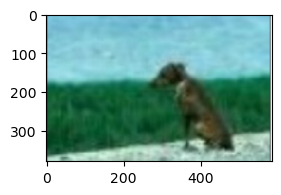

In [97]:
#读取图片
img = plt.imread('D:\机器学习ppt\IMG_20240626_174632.jpg')
row = img.shape[0]
col = img.shape[1]
plt.subplot(121)
plt.imshow(img)

In [98]:

def FCM(X, eps, k, m,max_its):
    # 初始化
    X = X.reshape(-1, 3)
    cluster_center = np.zeros([k, 3])
    
    distance = np.zeros([k, row * col])  # 欧氏距离
    its = 0  # 迭代次数
    
    goal_j = np.array([])  # 迭代终止条件：目标函数
    goal_u = np.array([])  # 迭代终止条件：隶属度矩阵元素最大变化量
    # 初始化隶属度矩阵
    u = np.random.dirichlet(np.ones(k), row * col).T
    while its<max_its:
        its += 1
        for i in range(k):
            cluster_center[i] = np.sum((np.tile(u[i] ** m, (3, 1))).T * X, axis=0) / np.sum(u[i] ** m)
        for i in range(k):
            distance[i] = np.sqrt(np.sum((X - np.tile(cluster_center[i], (row * col, 1))) ** 2, axis=1))
        # 目标函数
        goal_j = np.append(goal_j, np.sum((u ** m) * distance ** 2))
        # 更新隶属度矩阵
        newu = np.zeros([k, row * col])
        for i in range(k):
            for j in range(k):
                newu[i] += (distance[i] / distance[j]) ** (2 / (m - 1))
            newu[i] = 1 / newu[i]
        goal_u = np.append(goal_u, np.max(newu - u))  # 隶属度元素最大变化量
        # 判断隶属度矩阵元素最大变化量是否小于阈值
        if np.max(newu - u) <=eps:
            break
        u=newu
    return u,goal_j,goal_u

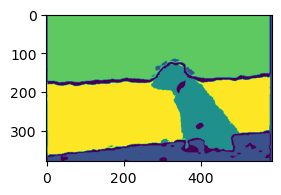

In [99]:
img1,goal_j,goal_u = FCM(img, 1e-4, 5, 2,100)
img1 = np.argmax(img1, axis=0)
plt.subplot(1, 2, 2)
plt.imshow(imahow, cmap='gray')
plt.show()